# Preprocessing tips database

<a id="importing"></a>
## Importing libraries and packages

In [4]:
# Mathematical operations and data manipulation
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [5]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [6]:
dataset = sns.load_dataset("tips")

<a id="exploring-data"></a>
## Exploring dataset

In [7]:
# Shape of the dataset
print("Shape of the dataset: ", dataset.shape)
# Head
dataset

Shape of the dataset:  (244, 7)


total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<a id="matrices"></a>
## Creating the features and target matrices

In [8]:
# Creating a variable, X, to store the features
X = dataset.drop("tip", axis=1)
X.head(10)

total_bill     sex smoker  day    time  size
0       16.99  Female     No  Sun  Dinner     2
1       10.34    Male     No  Sun  Dinner     3
2       21.01    Male     No  Sun  Dinner     3
3       23.68    Male     No  Sun  Dinner     2
4       24.59  Female     No  Sun  Dinner     4
5       25.29    Male     No  Sun  Dinner     4
6        8.77    Male     No  Sun  Dinner     2
7       26.88    Male     No  Sun  Dinner     4
8       15.04    Male     No  Sun  Dinner     2
9       14.78    Male     No  Sun  Dinner     2

In [9]:
X.shape

(244, 6)

In [10]:
# Target
Y = dataset["tip"]
Y.head(10)

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
5    4.71
6    2.00
7    3.12
8    1.96
9    3.23
Name: tip, dtype: float64

In [11]:
Y.shape

(244,)

<a id="cleaning"></a>
## Data cleaning

In [12]:
size = dataset["size"]
size.loc[:15] = np.nan
size.head(20)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

In [13]:
size.shape

(244,)

In [14]:
size.isnull().sum()

16

In [15]:
mean = size.mean()
mean = round(mean)
print(mean)

3


In [16]:
size.fillna(mean, inplace=True)
size.head(20)

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

<a id="visualisation-data"></a>
## Visualisation

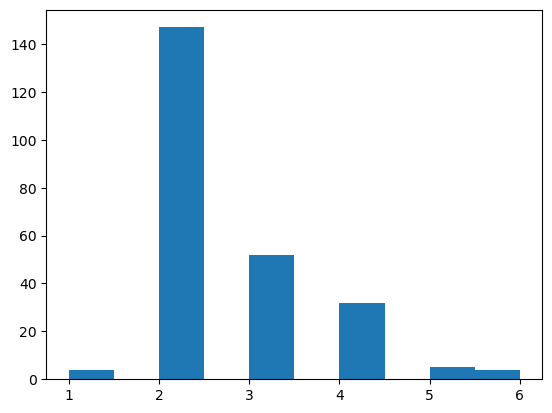

In [17]:
plt.hist(size)
plt.show()

<a id="feature-engineering"></a>
## Feature engineering

### Converting categorical features into numeric values

In [18]:
enc = LabelEncoder()
# Using the built-in fit_transform() method to assign a numeric value
# to each categorical feature and output the result
dataset["sex"] = enc.fit_transform(dataset["sex"].astype("str"))
dataset["smoker"] = enc.fit_transform(dataset["smoker"].astype("str"))
dataset["day"] = enc.fit_transform(dataset["day"].astype("str"))
dataset["time"] = enc.fit_transform(dataset["time"].astype("str"))

dataset.head()

total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    2     0   3.0
1       10.34  1.66    1       0    2     0   3.0
2       21.01  3.50    1       0    2     0   3.0
3       23.68  3.31    1       0    2     0   3.0
4       24.59  3.61    0       0    2     0   3.0

### Dealing with outliers

In [19]:
min_val = size.mean() - (3 * size.std())
print(min_val)

-0.1974349065787404


In [20]:
max_val = size.mean() + (3 * size.std())
print(max_val)

5.369566054119724


In [21]:
outliers = size[size > max_val]
outliers.count()

4

In [22]:
print(outliers)

125    6.0
141    6.0
143    6.0
156    6.0
Name: size, dtype: float64


In [23]:
age = size[size <= max_val]
age.shape

(240,)

### Normalizing and standardizing data

In [24]:
tips_normalized = (dataset - dataset.min()) / (dataset.max() - dataset.min())
tips_normalized.head(10)

total_bill       tip  sex  smoker       day  time  size
0    0.291579  0.001111  0.0     0.0  0.666667   0.0   0.4
1    0.152283  0.073333  1.0     0.0  0.666667   0.0   0.4
2    0.375786  0.277778  1.0     0.0  0.666667   0.0   0.4
3    0.431713  0.256667  1.0     0.0  0.666667   0.0   0.4
4    0.450775  0.290000  0.0     0.0  0.666667   0.0   0.4
5    0.465438  0.412222  1.0     0.0  0.666667   0.0   0.4
6    0.119397  0.111111  1.0     0.0  0.666667   0.0   0.4
7    0.498743  0.235556  1.0     0.0  0.666667   0.0   0.4
8    0.250733  0.106667  1.0     0.0  0.666667   0.0   0.4
9    0.245287  0.247778  1.0     0.0  0.666667   0.0   0.4

In [25]:
tips_standardized = (dataset - dataset.mean()) / dataset.std()
tips_standardized.head(10)

total_bill       tip       sex    smoker       day      time     size
0   -0.314066 -1.436993 -1.340598 -0.783179  0.278585 -0.620307  0.44613
1   -1.061054 -0.967217  0.742879 -0.783179  0.278585 -0.620307  0.44613
2    0.137497  0.362610  0.742879 -0.783179  0.278585 -0.620307  0.44613
3    0.437416  0.225291  0.742879 -0.783179  0.278585 -0.620307  0.44613
4    0.539635  0.442111 -1.340598 -0.783179  0.278585 -0.620307  0.44613
5    0.618266  1.237116  0.742879 -0.783179  0.278585 -0.620307  0.44613
6   -1.237411 -0.721488  0.742879 -0.783179  0.278585 -0.620307  0.44613
7    0.796869  0.087972  0.742879 -0.783179  0.278585 -0.620307  0.44613
8   -0.533108 -0.750398  0.742879 -0.783179  0.278585 -0.620307  0.44613
9   -0.562313  0.167472  0.742879 -0.783179  0.278585 -0.620307  0.44613